### Decision Tree Using Iris Dataset

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

##### Importing Dataset and EDA

In [2]:
data = load_iris()
data.data.shape

(150, 4)

In [3]:
print('Classes to predict: ',data.target_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']


In [4]:
data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [5]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
data1.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

##### Setting data and training the model

In [7]:
X = data.data
y = data.target

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [9]:
Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(X_train,y_train)

DecisionTreeClassifier()

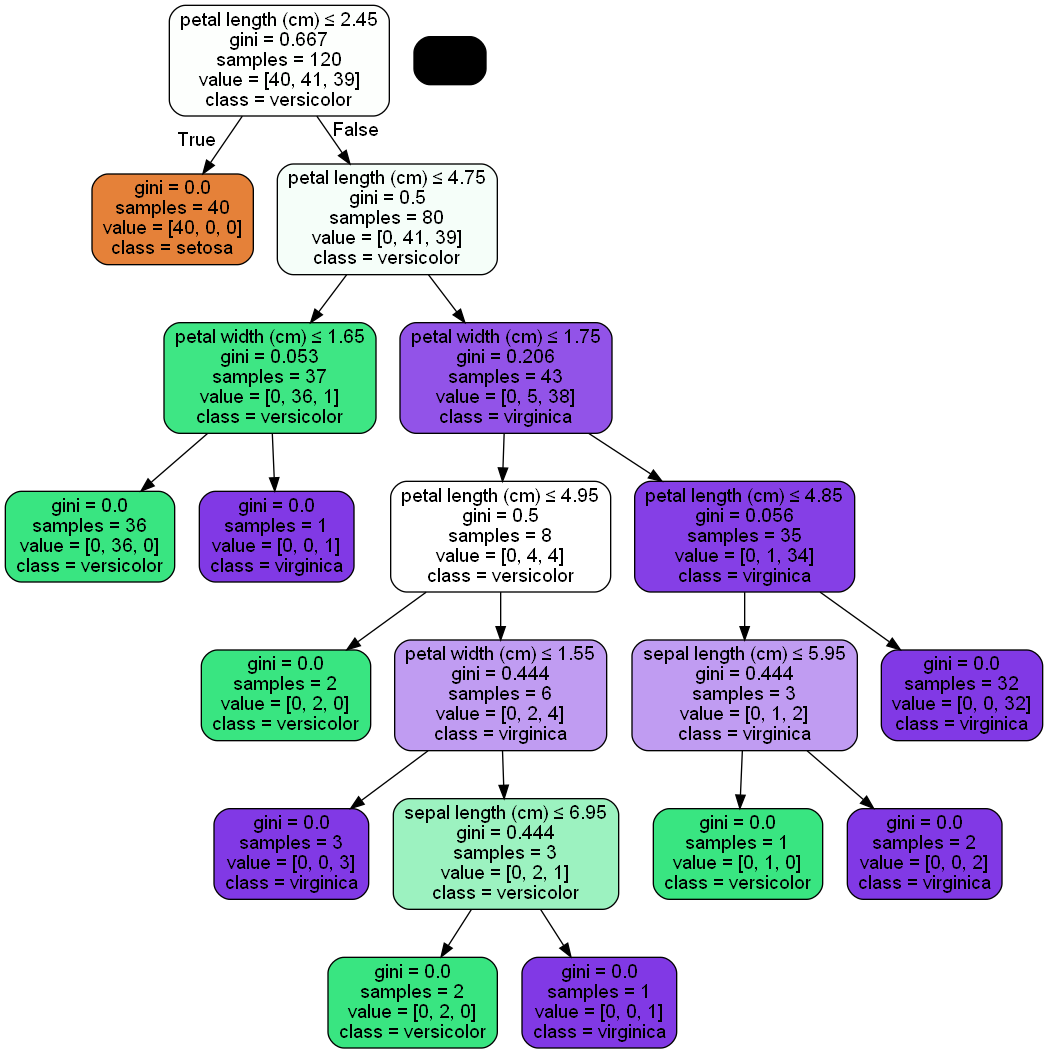

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(Iris_clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [11]:
print('Accuracy score is: ',cross_val_score(Iris_clf,X_train,y_train,cv=3,scoring='accuracy').mean())

Accuracy score is:  0.9416666666666668


In [12]:
y_predict = Iris_clf.predict(X_test)
y_predict

print('Model Accuracy Score on totally unseen data(X_test) is: ',accuracy_score(y_test,y_predict)*100,'%')
multilabel_confusion_matrix(y_test,y_predict)

Model Accuracy Score on totally unseen data(X_test) is:  100.0 %


array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]], dtype=int64)

#### Entropy based Descision Tree

In [13]:
Iris_clf_en = DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
Iris_clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

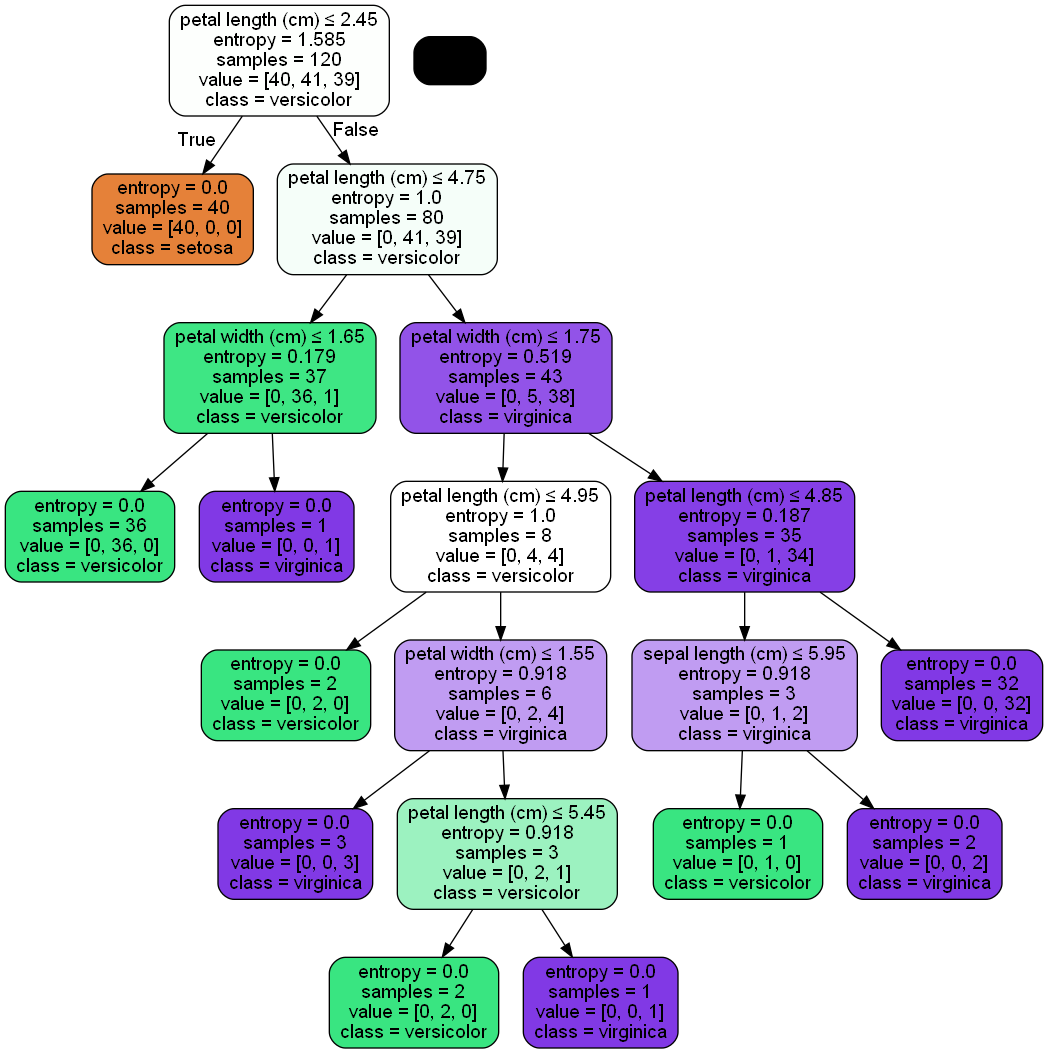

In [14]:
dot_data = StringIO()
export_graphviz(Iris_clf_en, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,feature_names = data.feature_names,class_names=data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [15]:
print('Accuracy score is: ',cross_val_score(Iris_clf_en,X_train,y_train,cv=3,scoring='accuracy').mean())

Accuracy score is:  0.9500000000000001


In [16]:
y_predict = Iris_clf_en.predict(X_test)
y_predict

print('Model Accuracy Score on totally unseen data(X_test) is: ',accuracy_score(y_test,y_predict)*100,'%')
multilabel_confusion_matrix(y_test,y_predict)

Model Accuracy Score on totally unseen data(X_test) is:  100.0 %


array([[[20,  0],
        [ 0, 10]],

       [[21,  0],
        [ 0,  9]],

       [[19,  0],
        [ 0, 11]]], dtype=int64)